In [1]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from keras.utils import *
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
#from keras import backend as k
#k.set_learning_phase(1)

Using TensorFlow backend.


In [2]:
'''
x = []
y = []

n_row = 0
text = open('train.csv', 'r') 
#text = open(loadpath + '/train.csv', 'r') 
row = csv.reader(text, delimiter=",")
for r in row:
    if n_row != 0:
        y.append(r[0])
        r[1] = np.array(r[1].split(' '))
        r[1] = np.reshape(r[1], (1, 48, 48))
        x.append(r[1])
    n_row = n_row+1
text.close()
x = np.array(x)
y = np.array(y)
x = x.astype(np.float64)
x = x/255
y = y.astype(np.int)
y = np_utils.to_categorical(y, num_classes=7)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
'''
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

In [3]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
'''
def main():
    model_path = 'AUG_final_8.hdf5'
    emotion_classifier = load_model(model_path)
    np.set_printoptions(precision=2)
    
    dev_feats = x_val
    
    predictions = emotion_classifier.predict(dev_feats)
    predictions = predictions.argmax(axis=-1)
    print (predictions)
    te_labels = y_val
    print (te_labels)
    conf_mat = confusion_matrix(te_labels,predictions)

    plt.figure()
    plot_confusion_matrix(conf_mat, classes=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"])
    plt.show()
'''

In [4]:
from keras import backend as k
k.set_learning_phase(1)

In [5]:
model_path = 'fuck34_val.hdf5'
emotion_classifier = load_model(model_path)
np.set_printoptions(precision=2)

In [6]:
dev_feats = x_val
    
predictions = emotion_classifier.predict(dev_feats)
predictions = predictions.argmax(axis=1)
print (predictions)
te_labels = y_val
te_labels = np.argmax(te_labels, axis=1)
print (te_labels)

[2 4 3 ..., 3 4 4]
[2 2 3 ..., 6 4 6]


In [7]:
conf_mat = confusion_matrix(te_labels,predictions)

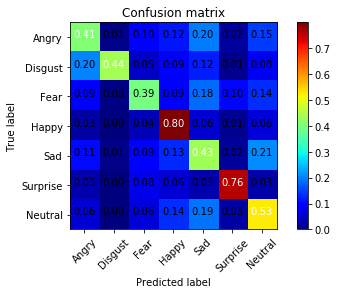

In [8]:
plt.figure()
plot_confusion_matrix(conf_mat, classes=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"])
plt.show()